In [37]:
%pylab inline
import pandas as pd

from IPython.display import display
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [73]:
CORRELATED_COMPANY_N = 10
COMPANY_TICKER = 'AAL'

# fundamentals.csv

In [77]:
fundamentals = pd.read_csv('/dataset/stock-market/nyse/fundamentals.csv', index_col=0)
display(fundamentals.head())
fdm_company = fundamentals[fundamentals['Ticker Symbol'] == COMPANY_TICKER]


,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


# prices-split-adjusted.csv


In [75]:
prices = pd.read_csv('/dataset/stock-market/nyse/prices-split-adjusted.csv', index_col=0)
aal = prices[prices.symbol == COMPANY_TICKER]
display(prices.head())

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Correlation

In [72]:
corr_companies = []
for symbol in prices.symbol.unique():
    company = prices[prices.symbol == symbol]
    corr = aal['open'].corr(company['open'])
    corr_companies.append((symbol, corr))
corr_companies = sorted(corr_companies, key=lambda x: -x[1])

display(corr_companies[:int(CORRELATED_COMPANY_N/2)])
display(corr_companies[-int(CORRELATED_COMPANY_N/2):])

[('AAL', 1.0),
 ('DAL', 0.97652854291542202),
 ('UAL', 0.97362318047276208),
 ('MAR', 0.96933344962939016),
 ('TEL', 0.95867438086216905)]

[('FE', -0.70682669837974499),
 ('APA', -0.72103817584649976),
 ('FCX', -0.74461042657817444),
 ('RIG', -0.81728669098316364),
 ('NEM', -0.86318370678733147)]

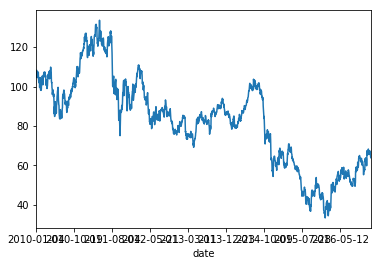

In [54]:
prices[prices.symbol == 'APA'].open.plot()

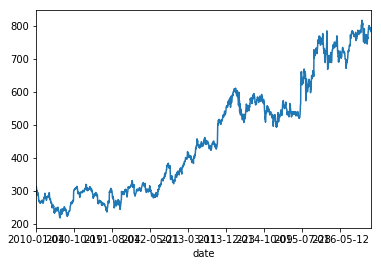

In [55]:
goog.open.plot()